# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


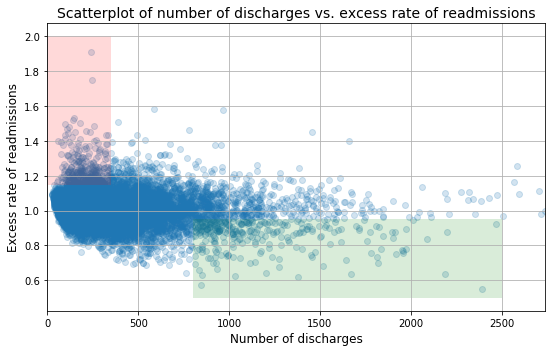

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

## Assessment of Preliminary Analysis

The scatterplot provided does not support the trends on hospital readmission rates. The majority of readmission rates for discharges in excess of 1000 holds steadily between 0.8 and 1.2, it does not trend downward. Furthermore, the assertions made about the incidences of excess rates with lower discharges and lower rates with higher discharges, respectively, are also incorrect. There is a substantially larger cluster of readmission rates that fall below 1.2 for lower discharges than there are above it (red region). Similarly, readmission rates for higher discharges appear to be somewhat evenly spread about a rate of 1.0 (green region).

### Inspect dataset

In [6]:
#clean_hospital_read_df.info()

In [7]:
# Drop all rows where 'Excess Readmission Ratio' is null
df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])

In [8]:
#df.info()

In [9]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


### Verify Statistics

In [10]:
from scipy import stats

In [11]:
# Count of Facilities where Discharges < 100
stat1_df = df[df['Number of Discharges']<100]
print('No. of Hospitals/Facilities with Discharges < 100: {}'.format(len(stat1_df)))

# Mean Excess Readmission Rate
stat1A = np.mean(stat1_df['Excess Readmission Ratio'])
print('Mean Excess Readmission Rate (Discharges < 100): {:4f}'.format(stat1A))

# Proportion of Facilities where Excess Readmission Rate > 1
stat1B = stat1_df['Excess Readmission Ratio'][stat1_df['Excess Readmission Ratio']>1].count()/len(stat1_df)
print('Percentage of Readmission Rates > 1: {:4f}'.format(stat1B))

No. of Hospitals/Facilities with Discharges < 100: 1188
Mean Excess Readmission Rate (Discharges < 100): 1.022618
Percentage of Readmission Rates > 1: 0.632155


In [12]:
# Count of Facilities where Discharges > 1000
stat2_df = df[df['Number of Discharges']>1000]
print('No. of Hospitals/Facilities with Discharges > 1000: {}'.format(len(stat2_df)))

# Mean Excess Readmission Rate
stat2A = np.mean(stat2_df['Excess Readmission Ratio'])
print('Mean Excess Readmission Rate (Discharges > 1000): {:4f}'.format(stat2A))

# Proportion of Facilities where Excess Readmission Rate > 1
stat2B = stat2_df['Excess Readmission Ratio'][stat2_df['Excess Readmission Ratio']>1].count()/len(stat2_df)
print('Percentage of Readmission Rates > 1: {:4f}'.format(stat2B))

No. of Hospitals/Facilities with Discharges > 1000: 463
Mean Excess Readmission Rate (Discharges > 1000): 0.978335
Percentage of Readmission Rates > 1: 0.444924


In [13]:
# Correlation Coefficent for Number of Discharges and Excess Readmission Rate
x = np.array(df['Number of Discharges'])
y = np.array(df['Excess Readmission Ratio'])
r,r_pval = stats.pearsonr(x,y)
print('Pearson\'s Correlation Coefficent: {:4f}'.format(r))
print('p-value of Correlation Coefficent: {}'.format(r_pval))

Pearson's Correlation Coefficent: -0.097398
p-value of Correlation Coefficent: 1.222547377680967e-25


The statistics provided in the preliminary analysis are misleading. The assertions made about the proportion of excess readmission rates for small facilities (Discharges < 100) and large facilities (Discharges > 1000) are correct. However, it is unclear whether or not there is a significant difference between the observed excess readmission rates between these two subgroups. The aforementioned subgroups is not exhaustive of the dataset given that they do not include mid-size facilities (100 < Discharges < 1000).

The conlcusions are incorrect. The Pearson correlation coefficent indicates a weak, negative correlation between hospital capacity (number of discharges) and readmission rates. This observation may be attributed to outliers within the dataset. Thus, it is an exaggeration to claim that there exists a significant correlation between these two factors. Also, the second claim that smaller hospitals lack the necessary resources to provide quality care is baseless given that the dataset provides no information about the resources allocated to any hospital/facility.



## Task 1

Null Hypothesis ($H_0$): There is no difference between the mean excess readmission rates for small and large facilities

Alternative Hypothesis ($H_A$): The mean excess readmission rates for small and large facilities are different

HYPOTHESIS TEST

$\mu_{D<100}$ = Mean Excess Readmission Rate for Small Facilities (Discharges < 100)

$\mu_{D>1000}$ = Mean Excess Readmission Rate for Large Facilities (Discharges > 1000)

$H_0$: $\mu_{D<100}$ = $\mu_{D>1000}$

$H_A$: $\mu_{D<100}$ $\neq$ $\mu_{D>1000}$

## Task 2

In [14]:
# t-test
mu_small = stat1_df['Excess Readmission Ratio'] # readmission rates for small facilities
mu_large = stat2_df['Excess Readmission Ratio'] # readmission rates for large facilities

t_stat, t_pval = stats.ttest_ind(mu_small,mu_large,equal_var=False)
print('z-statistic: {:4f}\np-value: {}'.format(abs(t_stat),t_pval))

z-statistic: 7.601742
p-value: 1.2752435451140344e-13


## Task 3

Given a threshold of $\alpha$ = 0.01, the *p*-value of the t-statistic ($p_{t-stat}$ = 1.275e-13),  shows that the null hypothesis must be rejected and that there is a statistical significance between the mean excess readmission rates between the small and large capacity facilities.

## Task 4

The statistical significance is based solely on the *p*-value of the test statistic. However, the practical significance relies on the target effect: the correlation between facility capacity and readmission rates. The statistical significance of the test may vary according to: A) the sample size, and B) the chosen significance level; and is consequently the victim of confounding although it supports the rejection of the null hypothesis. However, the Pearson's correlation coefficent ($R$ = -0.097398) between these two measures is very small, and can be considered insignificant.

Based on this information, one should rescind the initial recommendations made to the client. There is insufficent evidence to justify the notion that facility capacity has a strong impact on readmission rates. Also, there is insufficent information provided regarding the availability nor allocation of resources across any facility.

## Task 5

The initial scatterplot provides a good visualization for the joint distribution of the data. However, it will be more beneficial to inspect the trends of the marginal distributions as indicated by histograms. To accomplish this goal, one needs to examine the jointplot of the data.

In [15]:
import seaborn as sns

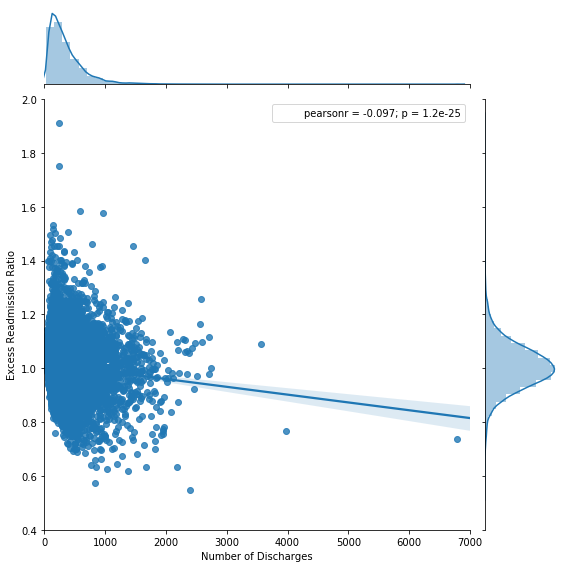

In [16]:
sns.jointplot('Number of Discharges','Excess Readmission Ratio',\
              data=df,kind='reg',size=8,\
              xlim=(0,7000), ylim=(0.4,2.0))